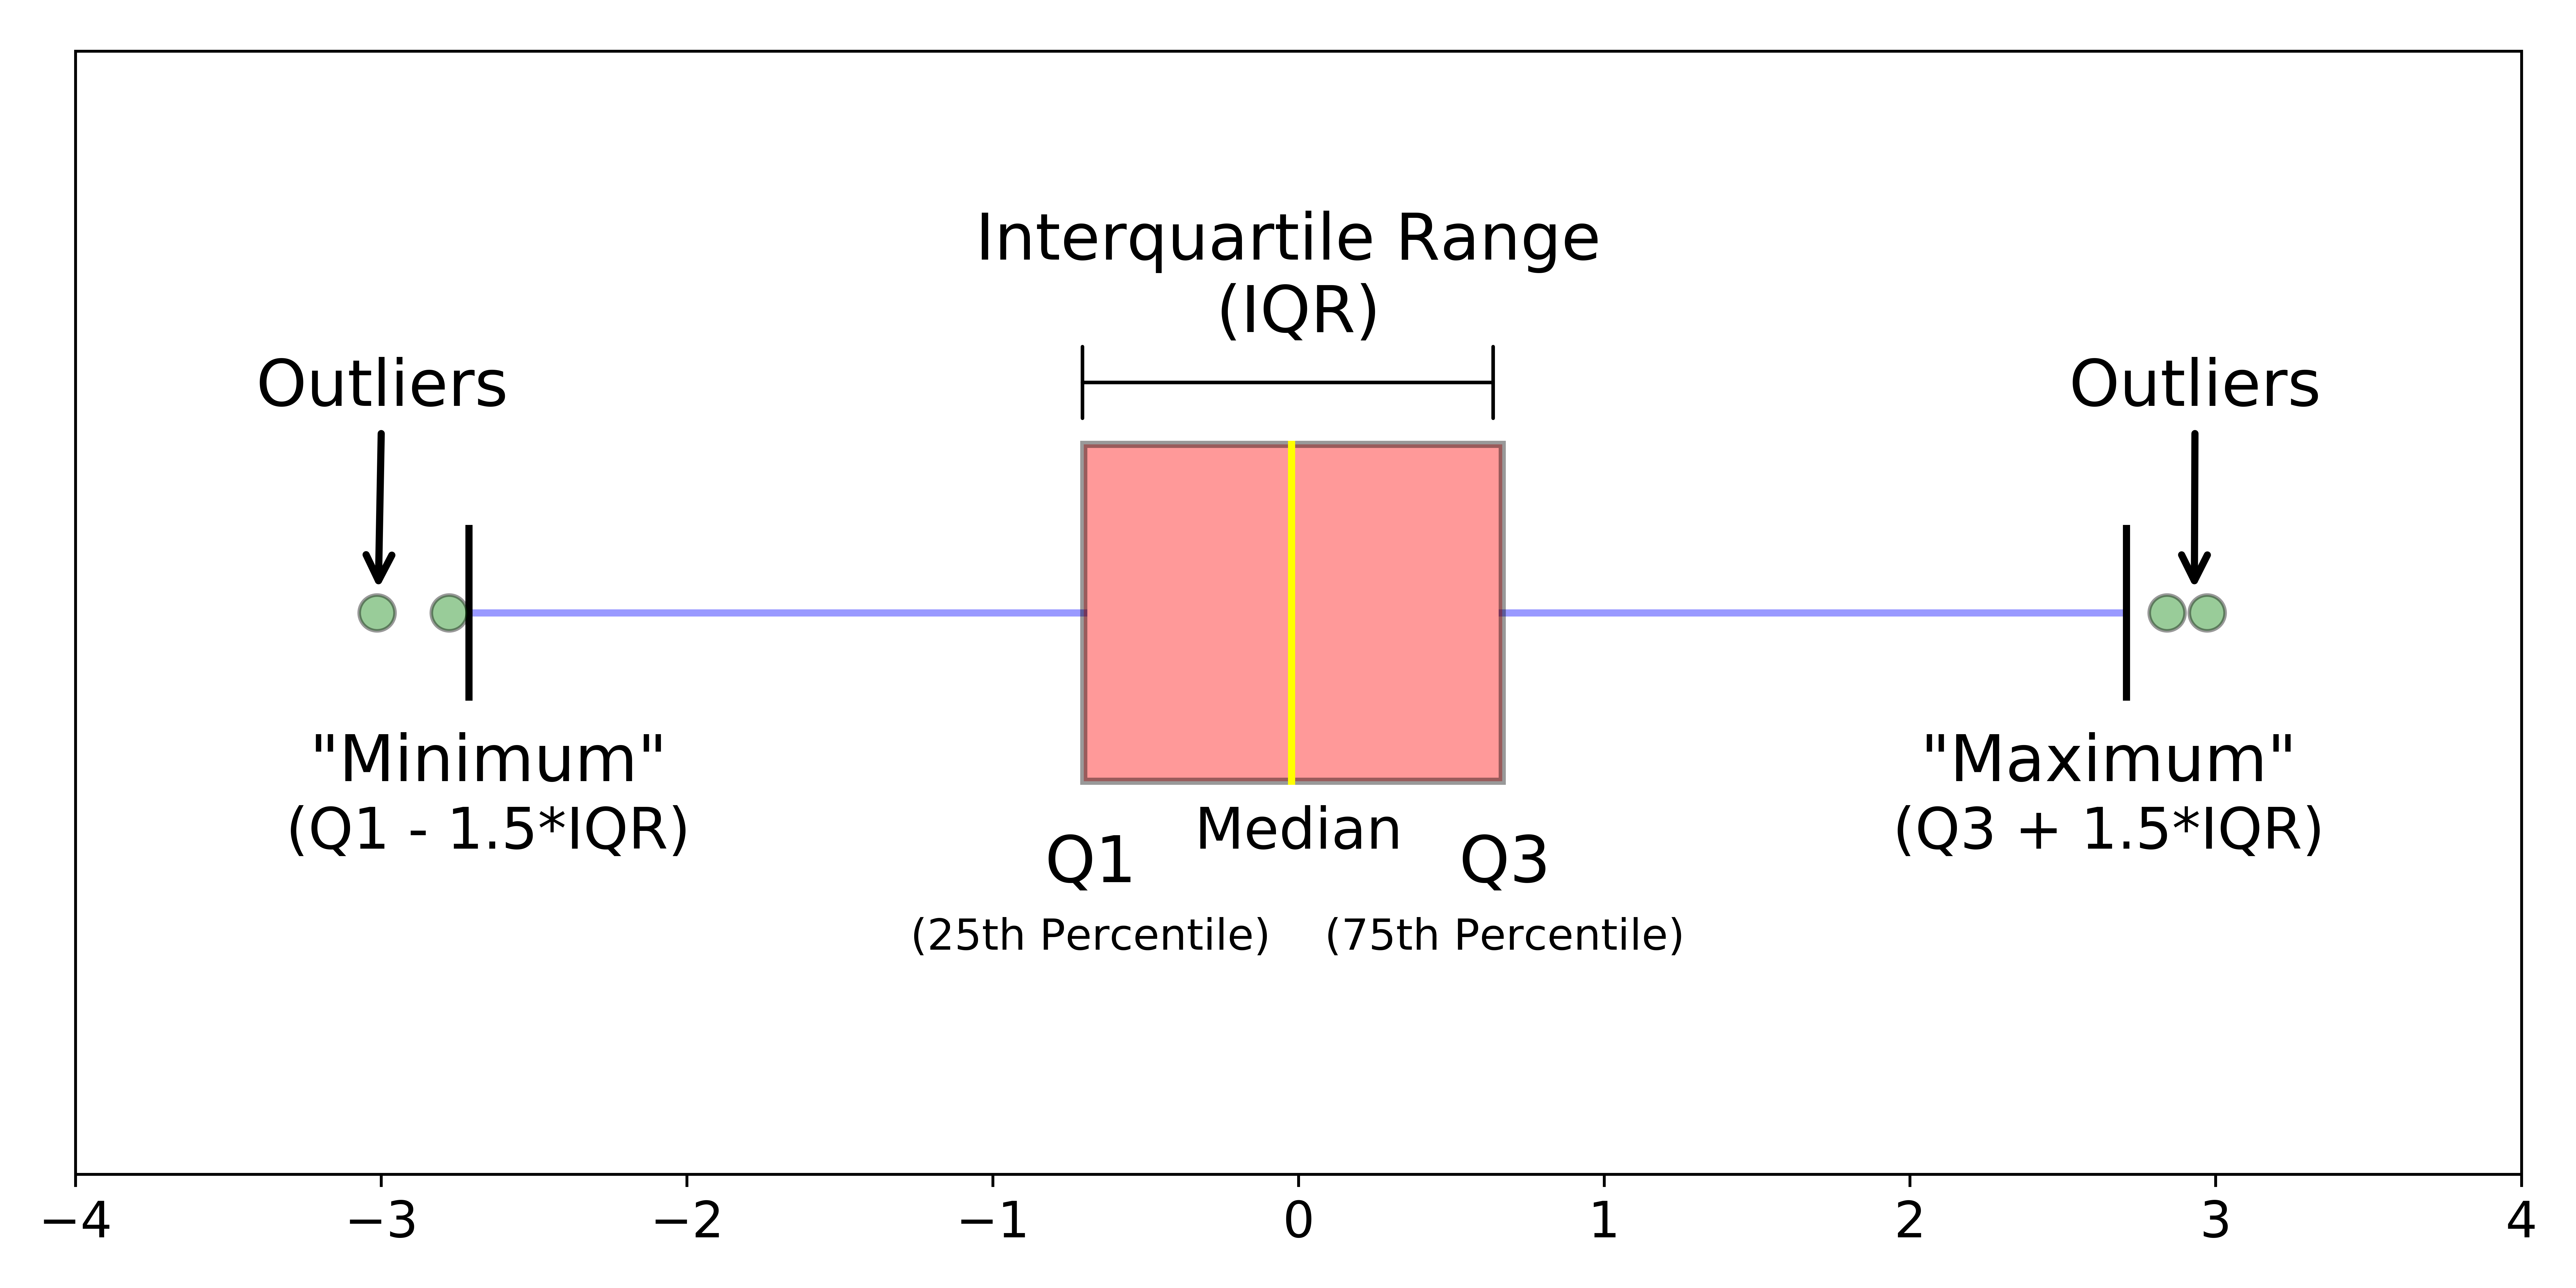

In [1]:
from IPython.display import Image, display

display(Image(filename='Boxplot.png'))

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('placement.csv')

In [5]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
333,6.74,20.0,1
59,7.70,32.0,1
36,6.85,16.0,1
371,5.90,29.0,0
922,7.68,23.0,1


In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


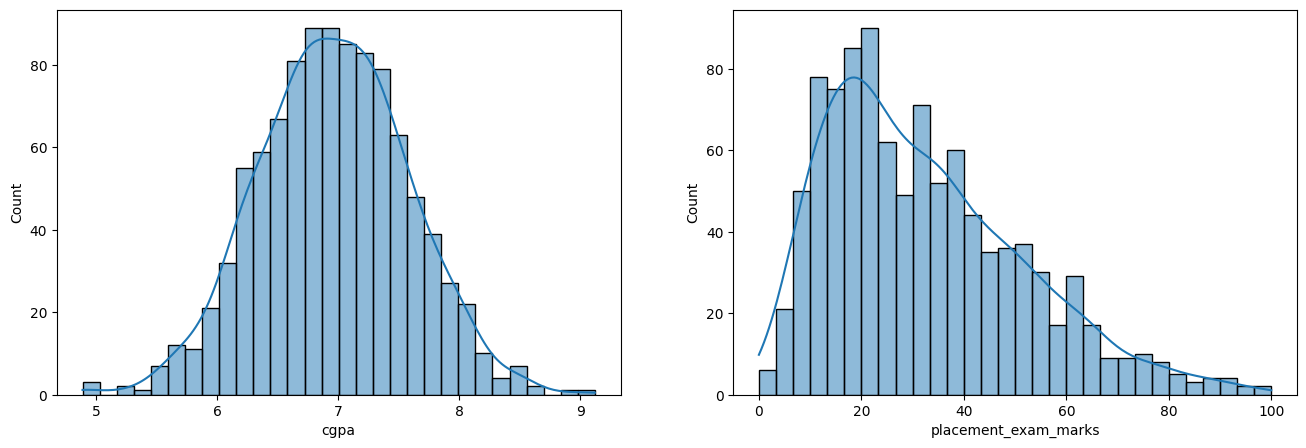

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True,bins=30)
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True,bins=30)
plt.show()

In [10]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [11]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [13]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

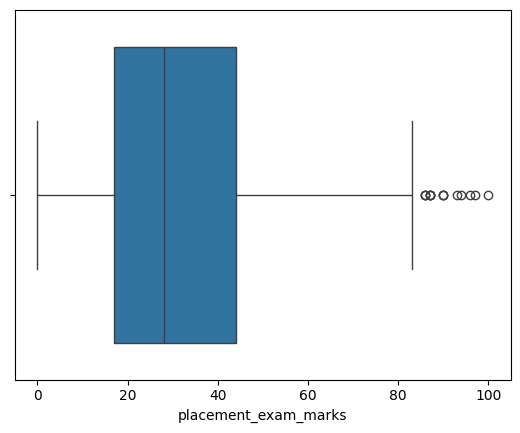

In [15]:
sns.boxplot(x=df['placement_exam_marks'])

In [16]:
#Finding IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [17]:
percentile75

np.float64(44.0)

In [18]:
percentile25

np.float64(17.0)

In [19]:
IQR=percentile75-percentile25

In [20]:
IQR

np.float64(27.0)

In [21]:
upper_limit=percentile75+1.5*IQR
lower_limit=percentile25-1.5*IQR

In [22]:
print("Upper Limit=",upper_limit)
print("Lower Limit=",lower_limit)

Upper Limit= 84.5
Lower Limit= -23.5


In [23]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [24]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [25]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [26]:
new_df.shape

(985, 3)

In [34]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


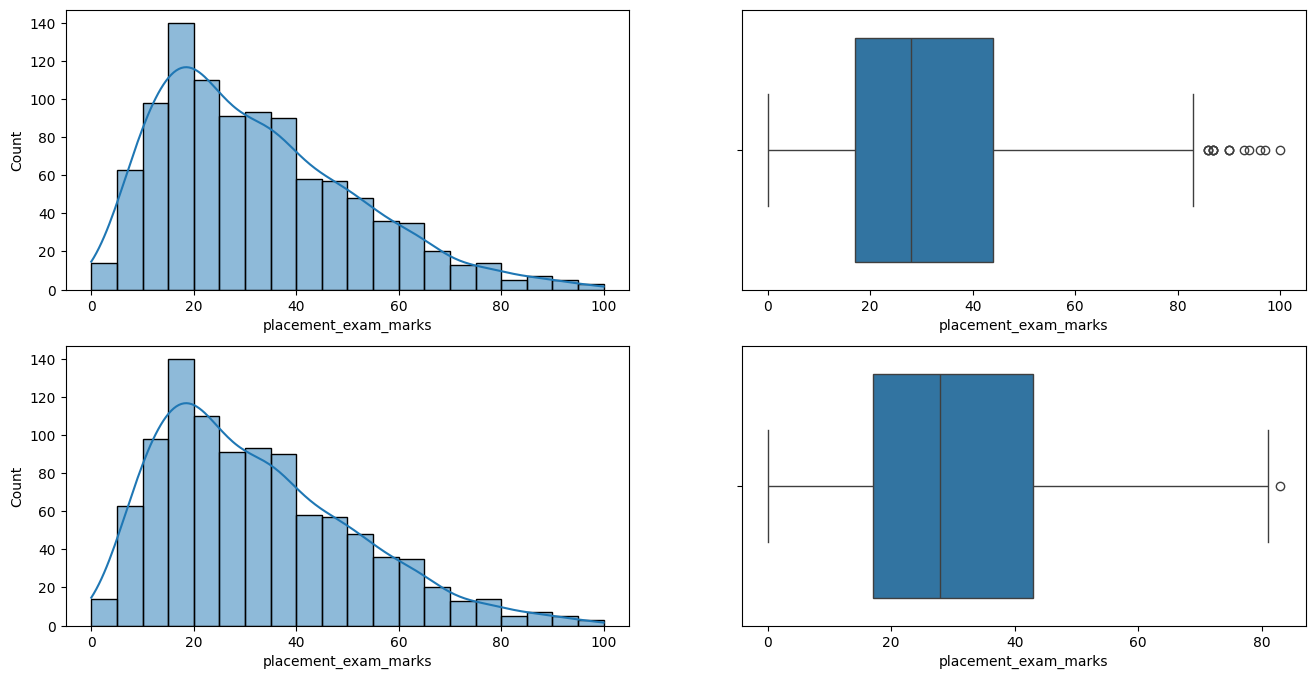

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],bins=20,kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(df['placement_exam_marks'],bins=20,kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])
plt.show()

In [46]:
new_df_cap=df.copy()
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(new_df_cap['placement_exam_marks']<lower_limit,
            lower_limit,
            new_df_cap['placement_exam_marks'])
)

In [47]:
new_df_cap.shape

(1000, 3)

In [48]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


AttributeError: 'Axes' object has no attribute 'histplot'

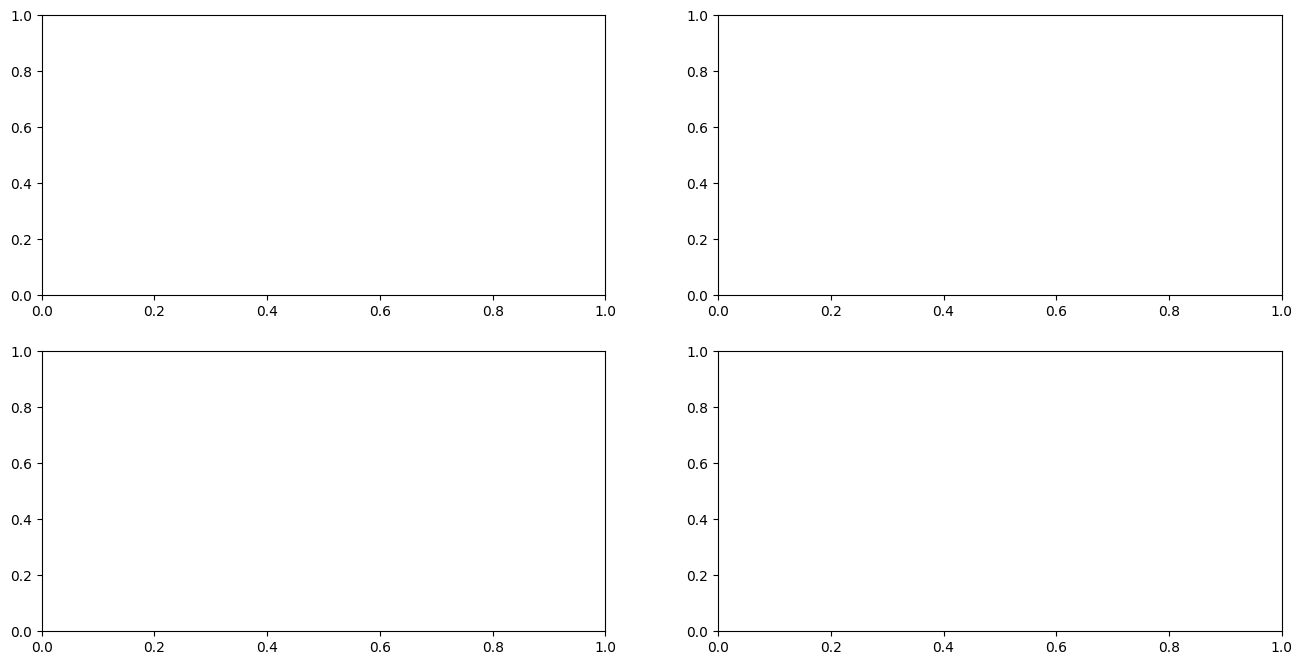

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],bins=20,kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(df['placement_exam_marks'],bins=20,kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])
plt.show()